In [7]:
import numpy as np
import scipy as sp
import scipy.constants as cte
from scipy import integrate as int

#INCISO 1:


E=lambda n: (((25*cte.e**2)/(np.sqrt(2*cte.m_e)*r0*0.5333)*(np.pi*cte.hbar)*(n+3/4))**2)**(1/5)
print('Energia BS ', E(0)) 

#INCISO 2:
#todo esto está evaluado para el estado fundamental

r0=1e-9
r2=(E(0)/5/cte.e)**(2)*r0

def V(r):
    return cte.e*5*(r/r0)**(1/2)

def p(r):
    return np.sqrt(2*cte.m_e*(E(0)-V(r)))

def modp(r):
    return np.sqrt(2*cte.m_e*(-E(0)+V(r)))

def intseno(r):
    return int.quad(p,r,r2)[0]

def intexp(r):
    return int.quad(modp,r2,r)[0]

#NORMALIZACIÓN

def intfea1(r): #el A**2 lo pongo afuera
    return 4/p(r)*np.sin(1/cte.hbar*intseno(r)+np.pi/4)**2
   
def intfea2(r):
    return np.exp(-2/cte.hbar*intexp(r))/modp(r)

def cuenta():
    return int.quad(intfea1,0,r2)[0]+int.quad(intfea2,r2,r2+1e-9)[0] #la segunda integral es prácticamente nula xq tiene -1/hbar en el exp; en realidad es prácticamente nula en la mayor parte del intervalo hasta inf, pero no cerca del punto de retorno
A=1/np.sqrt(cuenta())

#PROBABILIDAD

def inicial(r):
    return np.exp(-r**2/(8*r0**2))/(np.sqrt(np.pi**3)*(4*r0)**3)

def phi01(r):
    return 2*A/np.sqrt(p(r))*np.sin(1/cte.hbar*intseno(r)+np.pi/4)
   
def phi02(r):
    return A*np.exp(-1/cte.hbar*intexp(r))/np.sqrt(modp(r))

def c01(r):
    return inicial(r)*phi01(r)*r*np.sqrt(4*np.pi) #la integral en el espacio deja el jacobiano r^2*4pi, pero WKB devuelve R(r), y queremos phi0(r)=R0(r)/(sqrt(4pi)*r) (1/sqrt(4pi)=Y_00)
def c02(r):
    return inicial(r)*phi02(r)*r*np.sqrt(4*np.pi) 

c0= int.quad(c01,0,r2)[0]+int.quad(c02,r2,r2+1e-9)[0] #otra vez la segunda integral no la hacemos hasta inf xq python la toma como prácticamente nula; cosa que vale en la mayor parte del intervalo pero no cerca del punto de retorno; de hecho termina dando 1e10
#cortamos el intervalo de integración de c0 hasta donde deja de valer WKB (ver anteúltima celda)
c0**2,A
#def ña(r):
#    return phi01(r)**2
#def ñe(r):
#    return phi02(r)**2
#int.quad(ña,0,r2) #para checar que esté bien normalizado --> da 0.9999999999999983+-1e-10 así que ahí no está el problema ****esto si tomamos como nula la segunda integral
#int.quad(ña,0,r2)[0],int.quad(ñe,r2,r2+1e-9)[0]#en realidad termina dando 0.87+0.13 aprox

Energia BS  5.472260978215397e-19


(8.773784394549752e+21, 1.586499628177974e-08)

C:\Users\Josefina Medina\anac\lib\site-packages\ipykernel_launcher.py:51: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Josefina Medina\anac\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Josefina Medina\anac\lib\site-packages\ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\Josefina Medina\anac\lib\site-packages\ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in double_scalars


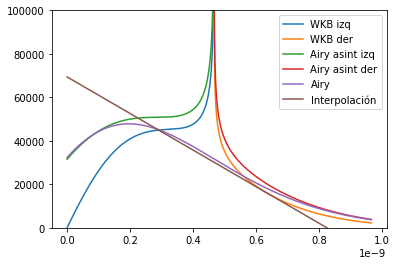

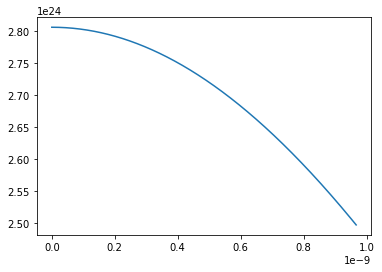

In [4]:
import matplotlib.pyplot as plt

#PLOT ESTADO FUNDAMENTAL WKB A LA IZQUIERDA DEL PUNTO DE RETORNO
x=np.linspace(0,r2,10000)
y=[phi01(x[i]) for i in range(len(x))]
plt.plot(x,y,label="WKB izq")
#y2=[2*A/np.sqrt(p(x[i]))*np.sin(np.pi/4) for i in range(len(x))] #1/sqrt(p) se va a 1e13 (desde 0 ya); A/sqrt(p) se va a 1e5 aprox; vemos que sin(pi/4) en vez de sen(inte/hbar+pi/4) es casi lo mismo
#plt.plot(x,y2) #al final no equide

#PLOT ESTADO FUNDAMENTAL WKB A LA DERECHA DEL PUNTO DE RETORNO
x2=np.linspace(r2,r2+5e-10,10000)
y2=[phi02(x2[i]) for i in range(len(x2))]
plt.plot(x2,y2,label="WKB der")

#PLOT AIRY ASINTÓTICA A LA IZQUIERDA
def derV(r):
    return 20*cte.e*r**3/r0**4
alpha=(2*cte.m_e/cte.hbar**2*derV(r2))**(1/3)
coefAi=np.sqrt(4*np.pi/alpha/cte.hbar)*A
def Ai(r): #esta es la forma asintótica de la airy; la que va en wkb para las fórmulas de conexión
    return coefAi/(np.sqrt(np.pi)*(alpha*(r2-r))**(1/4))*np.sin(2/3*(alpha*(r2-r))**(3/2)+np.pi/4)
yAi=[Ai(x[i]) for i in range(len(x))]
plt.plot(x,yAi,label="Airy asint izq")

#PLOT AIRY ASINTÓTICA A LA DERECHA
def derV(r):
    return 20*cte.e*r**3/r0**4
def Aid(r): #esta es la forma asintótica de la airy; la que va en wkb para las fórmulas de conexión
    return coefAi/(2*np.sqrt(np.pi)*(alpha*(-r2+r))**(1/4))*np.exp(-2/3*(alpha*(-r2+r))**(3/2))
yAid=[Aid(x2[i]) for i in range(len(x2))]
plt.plot(x2,yAid,label="Airy asint der")

#PLOT AIRY 
import scipy.special as sf
x3=np.linspace(0,r2+5e-10,10000)
aiñ=[coefAi*sf.airy(alpha*(x3[i]-r2))[0] for i in range(len(x3))]
plt.plot(x3,aiñ,label="Airy") #da una recta pero está bien xq es la región donde decrece después del punto de retorno (o sea no está tan a la izquieda como para oscilar ni tan a la derecha como para decaer a cero)

#PLOT INTERVALO DE VALIDEZ (pero me está dando cualquiera)
#plt.plot(np.linspace(r2-(2*cte.m_e*derV(r2)/cte.hbar**2)**(1/3),r2+(2*cte.m_e*derV(r2)/cte.hbar**2)**(1/3),1000),[8e4]*1000)

#PLOT RECTA
puntox1=2.9088633003564637e-10 #Estos dos puntos son los que salen de la última celda del código, donde vemos aprox el rango de validez de WKB
puntox2=6.301299599910668e-10
puntoy1=phi01(2.9088633003564637e-10)
puntoy2=phi02(6.301299599910668e-10)
def recta(x):
    return (puntoy2-puntoy1)/(puntox2-puntox1)*(x-puntox1)+puntoy1
plt.plot(x3,recta(x3), label="Interpolación")

plt.ylim(0,1e5)
plt.legend()

#PLOT ESTADO INICIAL
yini=[inicial(i) for i in x3]
plt.show()
plt.plot(x3,yini)


C:\Users\Josefina Medina\anac\lib\site-packages\ipykernel_launcher.py:54: RuntimeWarning: divide by zero encountered in double_scalars


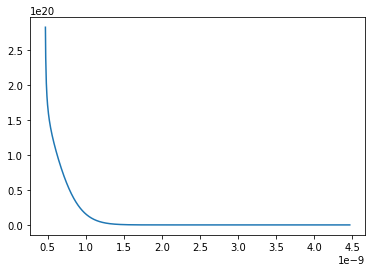

In [5]:
#COMO PARA VER QUE LA SEGUNDA INTEGRAL SE HACE CERO MÁS O MENOS EN 1e-9
x1=np.linspace(r2,r2+4e-9,1000)
y1=[c02(x1[i]) for i in range(len(x1))]
plt.plot(x1,y1) 

C:\Users\Josefina Medina\anac\lib\site-packages\numpy\__init__.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """
C:\Users\Josefina Medina\anac\lib\site-packages\numpy\__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """


0.0 , 0.0


C:\Users\Josefina Medina\anac\lib\site-packages\numpy\__init__.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """
C:\Users\Josefina Medina\anac\lib\site-packages\numpy\__init__.py:1: RuntimeWarning: invalid value encountered in double_scalars
  """


6.015941133334407e-10 , 1.2892310737934978


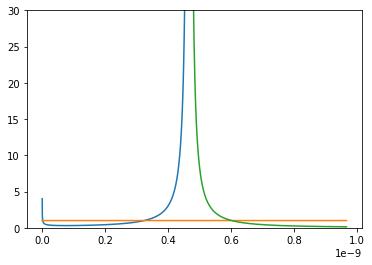

In [8]:
#CHEQUEAR RANGO DE VALIDEZ DE WKB

import sympy as sym
r=sym.symbols('r')
pr= 1/sym.sqrt(2*cte.m_e*(E(0)-cte.e*5*(r/r0)**(1/2)))
derp=sym.diff(pr,r)
derpl = sym.lambdify(r,derp) #para poder evaluar la derivda de 1/p(r)
plt.plot(x3,[derpl(i)*cte.hbar for i in x3]) 
plt.ylim(0,3e1) 
plt.plot(x3,[1]*len(x3)) 
for i in x3:
    if derpl(i)*cte.hbar>=1:
        print(i,",",i/r2) #o sea wkb vale como hasta un 68% de r2
        break
        
#Ahora ídem con modp para la zona r>r2
modpr= 1/sym.sqrt(2*cte.m_e*(-E(0)+cte.e*5*(r/r0)**(1/2)))
dermodp=sym.diff(modpr,r)
dermodpl = sym.lambdify(r,dermodp) #para poder evaluar la derivda de 1/|p(r)|
plt.plot(x3,[-dermodpl(i)*cte.hbar for i in x3])
for i in x3:
    if -dermodpl(i)*cte.hbar<=1:
        print(i,",",i/r2) #o sea wkb vale desde aprox 3/2*r2
        break
#dermodpl(r) 